In [ ]:
import cv2
import numpy as np
from tqdm import tqdm 
import os
DIR_INPUT = '/content/drive/MyDrive/BME2-3/LISC Database'
label = [f'{DIR_INPUT}/Ground Truth Segmentation/Baso/areaforexpert1', 
         f'{DIR_INPUT}/Ground Truth Segmentation/eosi/areaforexpert1', 
         f'{DIR_INPUT}/Ground Truth Segmentation/lymp/areaforexpert1', 
         f'{DIR_INPUT}/Ground Truth Segmentation/mono/areaforexpert1', 
         f'{DIR_INPUT}/Ground Truth Segmentation/neut/areaforexpert1']

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm 
from sklearn.utils import shuffle
#from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import tensorflow as tf
import keras
#from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
#from keras.initializers import he_normal
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#from keras.preprocessing.image import ImageDataGenerator
import imutils
import itertools

In [ ]:
def findEdges(image):
    # find edges in image
    # gray = cv2.GaussianBlur(image, (1, 1), 0)
    edged = cv2.Canny(image, 0, 0)
    # edged = cv2.dilate(edged, None, iterations=1)
    # edged = cv2.erode(edged, None, iterations=1)
    return edged
def getBoxes(contours, orig):
    boxes = []
    centers = []
    for contour in contours:
        box = cv2.boundingRect(contour)
        # box = cv2.minAreaRect(contour)
        # box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
        box = np.array(box, dtype="int")
        (tl, tr, br, bl) = box
        if (dist.euclidean(tl, bl)) > 0 and (dist.euclidean(tl, tr)) > 0:
            boxes.append(box)
    return boxes
def getImgContours(edged):
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key=lambda x: cv2.contourArea(x))
    return contours

In [ ]:
def loadimage(dataset):
    list_box = []
    list_name = []
    boxes = []
    count =0
    for file in tqdm(os.listdir(dataset)):
        temp = []
        img_path = os.path.join(dataset, file)
        img = cv2.imread(img_path)
        edgedImage = findEdges(img)
        edgedContours = getImgContours(edgedImage)
        edgedBoxes =  getBoxes(edgedContours, img.copy())
        temp.append(file)
        temp.append(edgedBoxes)
        boxes.append(temp)
    return boxes

In [ ]:
baso = loadimage(label[0])
eosi = loadimage(label[1])
lymp = loadimage(label[2])
mono = loadimage(label[3])
neut = loadimage(label[4])

100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


In [ ]:
print(baso)
print(eosi)
print(lymp)
print(mono)
print(neut)

[['1_expert.bmp', [array([259,  79,  93,  87])]], ['3_expert.bmp', [array([362, 209,  86,  84])]], ['5_expert.bmp', [array([322, 297,  91,  89])]], ['2_expert.bmp', [array([134, 351,  85,  82])]], ['4_expert.bmp', [array([185, 274,  79,  77])]], ['9_expert.bmp', [array([109, 183,  79,  81])]], ['8_expert.bmp', [array([343, 340,  86,  97])]], ['6_expert.bmp', [array([293, 244,  87,  92])]], ['7_expert.bmp', [array([405,  53,  84,  84]), array([337, 410,  91,  92])]], ['10_expert.bmp', [array([584, 272,  74,  74])]], ['13_expert.bmp', [array([100, 278,  76,  95])]], ['11_expert.bmp', [array([453, 291,  83,  70])]], ['12_expert.bmp', [array([460, 198,  77,  68])]], ['15_expert.bmp', [array([150, 392,  82,  68])]], ['17_expert.bmp', [array([256, 106,  62,  70])]], ['16_expert.bmp', [array([222, 331,  70,  64])]], ['14_expert.bmp', [array([554, 298,  90,  83])]], ['21_expert.bmp', [array([366, 404,  63,  68])]], ['19_expert.bmp', [array([130, 321,  61,  68])]], ['20_expert.bmp', [array([341

In [ ]:
baso

[['1_expert.bmp', [array([259,  79,  93,  87])]],
 ['3_expert.bmp', [array([362, 209,  86,  84])]],
 ['5_expert.bmp', [array([322, 297,  91,  89])]],
 ['2_expert.bmp', [array([134, 351,  85,  82])]],
 ['4_expert.bmp', [array([185, 274,  79,  77])]],
 ['9_expert.bmp', [array([109, 183,  79,  81])]],
 ['8_expert.bmp', [array([343, 340,  86,  97])]],
 ['6_expert.bmp', [array([293, 244,  87,  92])]],
 ['7_expert.bmp', [array([405,  53,  84,  84]), array([337, 410,  91,  92])]],
 ['10_expert.bmp', [array([584, 272,  74,  74])]],
 ['13_expert.bmp', [array([100, 278,  76,  95])]],
 ['11_expert.bmp', [array([453, 291,  83,  70])]],
 ['12_expert.bmp', [array([460, 198,  77,  68])]],
 ['15_expert.bmp', [array([150, 392,  82,  68])]],
 ['17_expert.bmp', [array([256, 106,  62,  70])]],
 ['16_expert.bmp', [array([222, 331,  70,  64])]],
 ['14_expert.bmp', [array([554, 298,  90,  83])]],
 ['21_expert.bmp', [array([366, 404,  63,  68])]],
 ['19_expert.bmp', [array([130, 321,  61,  68])]],
 ['20_exper

In [18]:
len(baso)

53

In [19]:
import pandas as pd
train_folder=['/Main Dataset/Baso',
              '/Main Dataset/eosi',
              '/Main Dataset/lymp',
              '/Main Dataset/mono',
              '/Main Dataset/neut']
def rename(path, matrix):
  if matrix==baso: link=train_folder[0]
  elif matrix==eosi: link=train_folder[1]
  elif matrix==lymp: link=train_folder[2]
  elif matrix==mono: link=train_folder[3]
  elif matrix==neut: link=train_folder[4]
  for i in range(len(matrix)+1):
    if (str(i)+'_expert.bmp')==path:
      return (link+'/'+str(i)+'.bmp')
def MakeCSV(path):
  image_path  = []
  x,y,h,w = [], [], [], []
  for i in range(5):
    if i==0: images=baso
    elif i==1: images=eosi
    elif i==2: images=lymp
    elif i==3: images=mono
    elif i==4: images=neut
    for image in images:
      # print(i)
      for loc in range(len(image[1])):
        image_path.append(rename(image[0], images))
        x.append(image[1][loc][0])
        y.append(image[1][loc][1])
        h.append(image[1][loc][2])
        w.append(image[1][loc][3])
  data = {'Path': image_path,'x': x,'y': y,'h': h,'w': w}
  df = pd.DataFrame(data, columns= ['Path', 'x', 'y', 'h', 'w'])
  df.to_csv(path, index = False, header=True)
  print (df)
MakeCSV(f'{DIR_INPUT}/Main Dataset/bbox.csv')

                          Path    x    y   h    w
0     /Main Dataset/Baso/1.bmp  259   79  93   87
1     /Main Dataset/Baso/3.bmp  362  209  86   84
2     /Main Dataset/Baso/5.bmp  322  297  91   89
3     /Main Dataset/Baso/2.bmp  134  351  85   82
4     /Main Dataset/Baso/4.bmp  185  274  79   77
..                         ...  ...  ...  ..  ...
256  /Main Dataset/neut/31.bmp  295  128  88   96
257  /Main Dataset/neut/31.bmp  284  386  87  114
258  /Main Dataset/neut/36.bmp  412  169  82   94
259  /Main Dataset/neut/47.bmp  156  231  81   93
260  /Main Dataset/neut/47.bmp  450  466  89   83

[261 rows x 5 columns]


In [ ]:
img = cv2.imread(f'{DIR_INPUT}/Ground Truth Segmentation/Baso/areaforexpert1/10_expert.bmp')
edgedImage = findEdges(img)
edgedContours = getImgContours(edgedImage)
edgedBoxes =  getBoxes(edgedContours, img.copy())

[array([584, 272,  74,  74])]


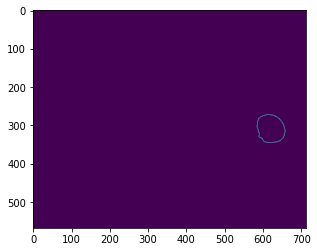

In [ ]:
plt.imshow(edgedImage)
print(edgedBoxes)